<a href="https://colab.research.google.com/github/jagadeeshbe/jagad/blob/master/BuildingLinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing numpylibrary
import numpy as np


**Linear Regression**


In [31]:
class Linear_Regression():

   def __init__( self, learning_rate, no_of_iterations ) :

        self.learning_rate = learning_rate

        self.no_of_iterations = no_of_iterations

    # fit function to train the model

   def fit( self, X, Y ) :

        # no_of_training_examples, no_of_features

        self.m, self.n = X.shape

        # initiating the weight and bias

        self.w = np.zeros( self.n )

        self.b = 0

        self.X = X

        self.Y = Y


        # implementing Gradient Descent for Optimization

        for i in range( self.no_of_iterations ) :

            self.update_weights()



    # function to update weights in gradient descent

   def update_weights( self ) :

        Y_prediction = self.predict( self.X )

        # calculate gradients

        dw = - ( 2 * ( self.X.T ).dot( self.Y - Y_prediction )  ) / self.m

        db = - 2 * np.sum( self.Y - Y_prediction ) / self.m

        # updating the weights

        self.w = self.w - self.learning_rate * dw

        self.b = self.b - self.learning_rate * db


    # Line function for prediction:

   def predict( self, X ) :

        return X.dot( self.w ) + self.b


Using Linear Regression for prediction

In [32]:
# importing dependencies
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


Data Preprocessing

In [33]:
# loading the data from csv file to pandas data frame

salary_data=pd.read_csv('/content/salary_data.csv')

In [34]:
# printing the first 5 cloumns of dataframe
salary_data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [35]:
salary_data.tail()

,YearsExperience,Salary
25,9.0,105582
26,9.5,116969
27,9.6,112635
28,10.3,122391
29,10.5,121872


In [7]:
# number of rows & columns in the dataframe
salary_data.shape

(30, 2)

In [36]:
# checking for missing values
salary_data.isnull().sum()

,0
YearsExperience,0
Salary,0


Splitting the feature & Target

In [37]:
X = salary_data.iloc[:, :-1].values
Y = salary_data.iloc[:, 1].values

In [38]:
print(X)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]


In [39]:
print(Y)

[ 39343  46205  37731  43525  39891  56642  60150  54445  64445  57189
  63218  55794  56957  57081  61111  67938  66029  83088  81363  93940
  91738  98273 101302 113812 109431 105582 116969 112635 122391 121872]


splitting the dataset into training & test data

In [40]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 1/3, random_state=2)

Training the Linear Regression model

In [41]:
model = Linear_Regression(learning_rate=0.02, no_of_iterations=1000)

In [42]:
model.fit(X_train, Y_train)

In [43]:
# printing the parameters values (weight & bias)

print('weight= ',model.w[0])
print('bias=',model.b)

weight=  9514.400999035135
bias= 23697.406507136307


y = 9514 (x) + 23697

salary = 9514(experience) + 23697

predict the salary value for test data

In [44]:
test_data_prediction = model.predict(X_test)

In [45]:
print(test_data_prediction)

[ 36066.12780588  34163.24760607  66512.21100279  58900.69020357
  91249.65360029  80783.81250135 101715.49469922  52240.60950424
  42726.20850521  88395.33330058]


Visualizing the predicted values & actual Values

Text(0, 0.5, 'Salary')

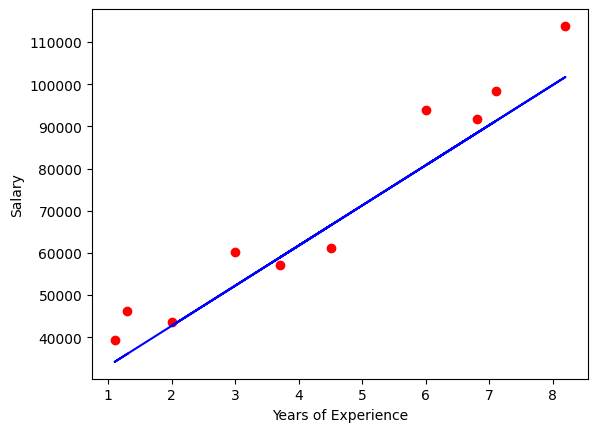

In [46]:
plt.scatter(X_test, Y_test, color='red')
plt.plot(X_test, test_data_prediction, color='blue')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')